# Distribuições a Priori e a Posteriori

## Priori 

Tratamos $\theta$ de um modelo como uma variável aleatória e atribuimos uma distribuição para esse parâmetro. O nome será distribuição a priori. Ao fazer modelagens, ela é em geral pré-definida pelo modelador, que é em geral aconselhado por um especialista. 

## Posteriori 

Sejam $X_1, ..., X_n$ v.a. observadas e um parâmetro $\theta$ desconhecido. A distribuição de $\theta$ condicionado nas variáveis aleatórias é a distribuição a posteriori. Observe a relação com o Teorema de Bayes. 

### Teorema 

Seuponha que $X_1, ..., X_n$ formam uma amostra aleatória de uma distribuição $f(x|\theta)$. Suponha que o parâmetro seja desconhecido e que a distribuição da priori seja $\xi(\theta)$. Então, a distribuição a posteriori é:

$$\xi(\theta|x) = \frac{f(x_1|\theta)...f(x_n|\theta)\xi(\theta)}{g_n(\theta)}, \theta \in \Omega$$

Onde $g_n$ é a distribuição marginal conjunta de $X_1,...,X_n$

Observe que, essencialmente $\xi(\theta|x) \propto f(x_1|\theta)...f(x_n|\theta)\xi(\theta)$, mas que sua integral seja $1$. Queremos que essa função seja integrável e a integral sobre o domínio seja $1$. 

## Função de Verossimilhança

Quando a função de densidade de probabilidade $f_n(x|\theta)$ das observações de uma amostra aleatória é vista como uma função de $\theta$, chamamos ela de função de verossimilhança.

$$
\theta \mapsto f_n(x|\theta) := L(\theta|x)
$$

## Observações Sequenciais e Predições

Nesse caso a ordem das variáveis $X_1, ..., X_n$ importam (como uma série temporal, por exemplo). Nesse caso, podemos, iterativamente fazer: 

$$\xi(\theta|x_1) \propto f(x_1|\theta)\xi(\theta)$$
$$\xi(\theta|x_1,...,x_{n+1}) \propto f(x_n|\theta)\xi(\theta|x_1,....,x_n)$$

Isso acontece dada a independência das variáveis aleatórias.

[Notebook de Referência](https://github.com/fonnesbeck/scipy2014_tutorial/blob/master/1_Introduction-to-Bayes.ipynb)

### Frequentistas 

- Os dados observados são considerados aleatórios, realidados de um processo aleatório. 
- Os parâmetros do modelo são fixos e desconhecidos
- Queremos derivas estimadores para os parâmetros desconhecidos. 

### Bayesianos

- Os dados são fixos, isto é, vieram de um processo aleatório, mas depois eles não se alteram. 
- Os parâmetros são usualmente representados por distribuições, são variáveis aleatórias. 
- Fórmula de Bayes. 

#### Simples exemplo de inferência Bayesiana 

Hemofilia é uma disordem genética que prejudica a coagulação em resposta a rupturas em vasos sanguíneos. É recessiva ligada ao cromossomo X. Isso implica que homens com 1 gene são afetados, enquanto as mulheres não são afetadas, mas portadoras.  

Considere uma mulher cuja mãe é portadora e tem um irmão afetado. Ela se casa com um homem não afetado. A mulher tem dois filhos consecutivos que não são afetados. Será que a mãe é portadora?

A pergunra é simples. Vamos tentar usar um pouco do que sabemos. Seja $W = 1$ se a mulher é portadora e $W = 0$ se ela não for portadora. Queremos saber $P(W = 1|s_1 = 0, s_2 = 0)$, isto é, os filhos não são afetados. 

Que informação nós temos ? A mãe dela é portadora, portanto uma priori interessante é:

$$P(W = 1) = 0.5 \Rightarrow O(W = 1) = \frac{P(W=1)}{P(W=0)} = 1 \text{ chances (odds) a priori }$$

Podemos calcular a função de verossimilhança: 

$$L(W = 1|s_1 = 0, s_2 = 0) = (0.5)(0.5) = 0.25$$
$$L(W = 0|s_1 = 0, s_2 = 0) = (1)(1) = 1$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
priori = 0.5   # P(W = 1)
p = 0.5        # prob de um filho ser afetado 

Likelihood = lambda w, s: np.prod([(1 - i, p**i*(1-p)**(1 - i))[w]for i in s])

s = [0,0]

posteriori = Likelihood(1,s)*priori/(Likelihood(1,s)*priori + Likelihood(0,s)*(1 - priori))
print("A probabilidade da mãe portar é {} com dois filhos não portadores.".format(posteriori))

A probabilidade da mãe portar é 0.2 com dois filhos não portadores.


In [3]:
s = [0]  # terceiro filho 

priori = posteriori

posteriori = Likelihood(1,s)*priori/(Likelihood(1,s)*priori + Likelihood(0,s)*(1 - priori))
print("A probabilidade da mãe portar é {:.3f} com três filhos não portadores.".format(posteriori))

A probabilidade da mãe portar é 0.111 com três filhos não portadores.


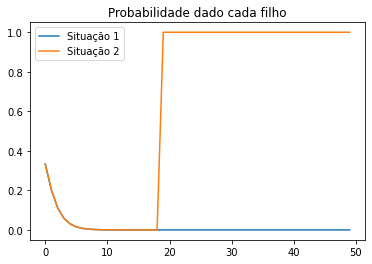

In [5]:
priori = 0.5
p = 0.5 
s = [0]
posteriori = []
for i in range(50): 
    posteriori.append(Likelihood(1,s)*priori/(Likelihood(1,s)*priori + Likelihood(0,s)*(1 - priori)))
    priori = posteriori[-1]

priori = 0.5 
posteriori2 = []
for i in range(50): 
    posteriori2.append(Likelihood(1,s)*priori/(Likelihood(1,s)*priori + Likelihood(0,s)*(1 - priori)))
    priori = posteriori2[-1]
    s = [np.random.choice([0,1], p = (0.9, 0.1))]

plt.plot(range(50), posteriori, label = 'Situação 1')
plt.plot(range(50), posteriori2, label = 'Situação 2')
plt.legend()
plt.title('Probabilidade dado cada filho')
plt.show()

## Princípio de Verossimilhança

Afirma que para uma inferência sobre um parâmetro $\theta$, **toda evidência de qualquer observação** de uma variável aleatória $X = x$ com distribuição $X \sim f(x|\theta)$ se encontra na função de verossimilhança $L(\theta|x)$.

A interpretação é de que qualquer observação de $X$ pode construir conclusões sobre $\theta$. Além disso, se pudéssemos obter informação de $\theta$ sobre outra variável aleatória $Y$ com verossimilhança $\tilde{L}$, teremos que $L(\theta|x) = c\cdot \tilde{L}(\theta|y)$. Isto é, as conclusões sobre o parâmetro  não dependem da observação feita. 

**Qual o problema?**

[Jeffreys](https://en.wikipedia.org/wiki/Harold_Jeffreys): 
"An hypothesis that may be true is rejected because it has failed to predict observable results that have not occurred. "

In [6]:
import pymc3 as pm 
from pymc3 import Model, Normal, Slice
from pymc3 import sample
from pymc3 import traceplot 
from pymc3.distributions import Interpolated 

from scipy import stats 

import matplotlib as mpl

plt.style.use('seaborn-darkgrid')

## Gerando os dados 

$$Y = \alpha + \beta_0\cdot X_1 + \beta_1\cdot X_2 + \text{erro}$$

In [8]:
# True parameters 
alpha_true = 5
beta0_true = 7
beta1_true = 13

# Size of the dataset 
size = 100 

# Random variables 
np.random.seed(1)

X1 = np.random.randn(size)
X2 = np.random.randn(size)*0.2

e = np.random.randn(size)

Y = alpha_true + beta0_true * X1 + beta1_true * X2 + e

## Especificando o modelo

Vamos fazer um modelo simples aqui, só para mostrar essa biblioteca nova. A ideia é mostrar como funciona a ideia de priori e posteriori. 

Vamos dizer que $Y \sim N(\mu, 1)$, onde 

$\mu = \alpha + \beta_1 X_1 + \beta_2 X_2$

In [10]:
model = Model()  #cria um novo modelo, que em Python, é um objeto

with model:      # Isso cria um contexto em python

    # Vamos dizer nossas prioris!
    alpha = Normal('alpha', mu = 0, sigma = 1)
    beta0 = Normal('beta0', mu = 12, sigma  = 1)
    beta1 = Normal('beta1', mu = 18, sigma = 1)

    # Valor esperado da saída 
    mu = alpha + beta0*X1 + beta1*X2

    # Verossimilhança das observações 
    Y_obs = Normal('Y_obs', mu = mu, sigma = 1, observed = Y)

    # Amostras da distribuição 
    trace = sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta1, beta0, alpha]
█Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.


A próxima função é um plot de distribuição a priori amostrada (que é basicamente um histograma) de cada parâmetro. Veja que parece um chiado em torno da média. 

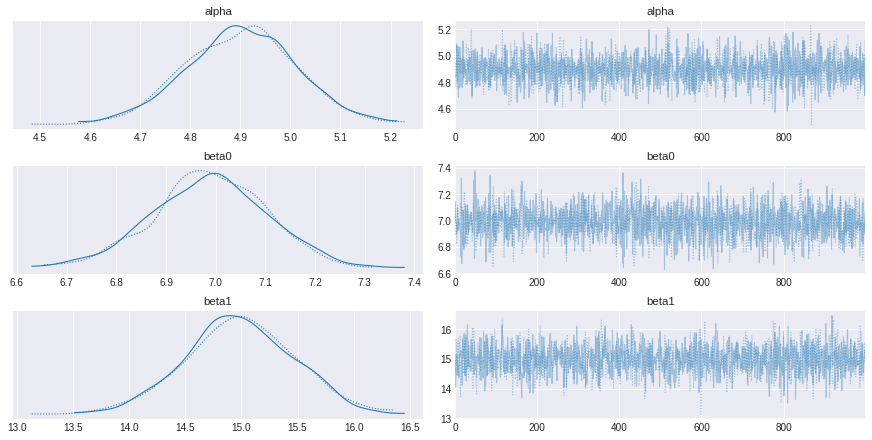

In [16]:
traceplot(trace);

Agora que nós temos os dados gerados $Y$, vamos atualizar nosso conhecimento, nossa confiança nos parâmetros, através da distribuição a posteriori. Os dados devem ser independentes a ada interação para que valha o que estudamos. Para isso, precisamos calcular a posteriori de cada parâmetro. Nesse caso, vamos utilizar uma aproximação para a distribuição, utlizando aproximação [Kernel](https://en.wikipedia.org/wiki/Kernel_density_estimation). Não se preocupe com isso, é só para mostrar que estamos calculado a posteriori

In [18]:
def from_posterior(param, samples):
    
    smin, smax = np.min(samples), np.max(samples)
    width = smax - smin
    
    x = np.linspace(smin, smax, 100)
    
    y = stats.gaussian_kde(samples)(x)

    # what was never sampled should have a small probability but not 0,
    # so we'll extend the domain and use linear approximation of density on it
    x = np.concatenate([[x[0] - 3 * width], x, [x[-1] + 3 * width]])
    y = np.concatenate([[0], y, [0]])
    return Interpolated(param, x, y)

Agora, vamos gerar mais dados e usar a Fórmula de Bayes e usaremos uma forma sequencial das observações, isto é, a posteriori da iteração $n-1$ será a priori da iteração $n$.

In [19]:
traces = [trace]      # salva os traços para que plotamos depois. 
for _ in range(10):   # _ indica uma variável que não é usada 

    #  Gerando mais e mais dados!
    X1 = np.random.randn(size)
    X2 = np.random.randn(size) * 0.2
    e = np.random.randn(size)
    Y = alpha_true + beta0_true * X1 + beta1_true * X2 + e

    model = Model()
    with model:
        # As novas prioris são as posterioris 
        alpha = from_posterior('alpha', trace['alpha'])
        beta0 = from_posterior('beta0', trace['beta0'])
        beta1 = from_posterior('beta1', trace['beta1'])

        # EValor esperado da saída 
        mu = alpha + beta0 * X1 + beta1 * X2

        # Calculando a verossimilhança dos novos dados 
        Y_obs = Normal('Y_obs', mu = mu, sigma = 1, observed = Y)

        # Amostrando da posteriori, porque não estamos calculando a forma fechada 
        trace = sample(1000)
        traces.append(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta1, beta0, alpha]
█Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 5 seconds.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta1, beta0, alpha]
█Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta1, beta0, alpha]
█Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta1, beta0, alpha]
█Sampling 2 chains for 1_00

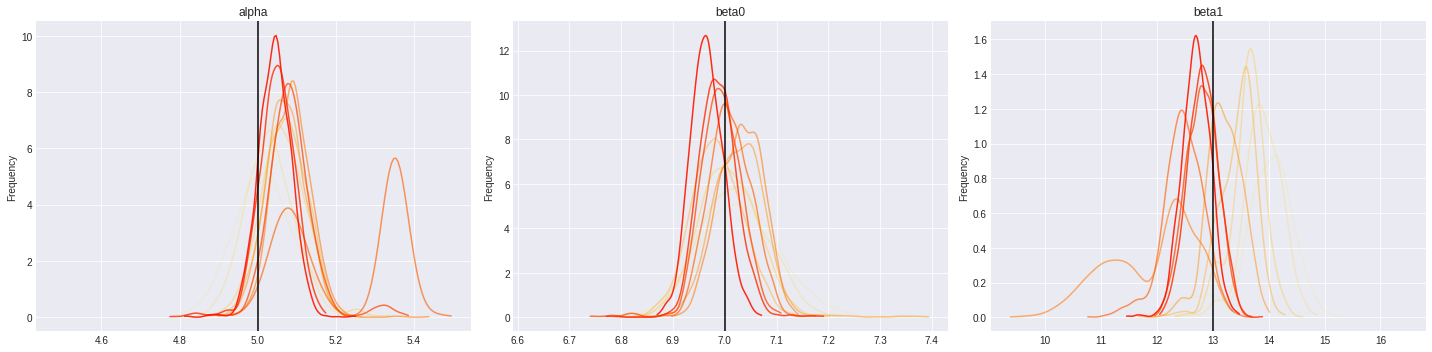

In [56]:
fig, ax = plt.subplots(1,3,figsize=(20, 5))

# Definindo cores 
cmap = mpl.cm.autumn      

for index, param in enumerate(['alpha', 'beta0', 'beta1']):

    for update_i, trace in enumerate(traces):

        samples = trace[param]
        smin, smax = np.min(samples), np.max(samples)
        x = np.linspace(smin, smax, 100)
        y = stats.gaussian_kde(samples)(x)

        ax[index].plot(x, y, color=cmap(1 - update_i / len(traces)), alpha = update_i/len(traces))

    ax[index].axvline({'alpha': alpha_true, 'beta0': beta0_true, 'beta1': beta1_true}[param], c='k')
    ax[index].set_ylabel('Frequency')
    ax[index].set_title(param)

plt.tight_layout();